# PHASE 3 PROJECT.




Author:
Daniel Muturi Karue

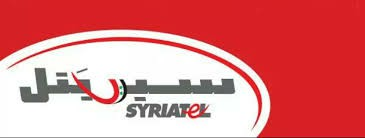





## Business Understanding
Telecommunication is the sending and receiving of messages by computer,telephone,radio and television, or the business of doing this.SyriaTel is one of the three mobile network providers in Syria. It operates a network of GSM 900/1800, 3G 2100 and 4G 1800 cellular networks. it was founded in January 2000 with its headquarters on Sehnaya Road in Damascus. When the company was founded, it was owned by the Egyptian Telecomunication company ORASCOM (25%) and Rami Makhlouf (75%) cousin of Syrian president Bashar Al-Assad. In 2003 ORASCOM sold its ownership in SyriaTel.The company has approximately 3500 employees and 8 million customers as of 2016. 

#### Problem Statement

The purpose of this project is to provide valuable insights on ways of reducing the loss of money because of customers who dont stick around very long, as well as a predictive model that can be used to make recommendations to the company.

#### Objectives
1. To analyze the effect of various factors like total day minutes, total day calls, total eve charge,etc on churn(which is a measurement of the percentage of accounts that cancel or choose not to renew their subscriptions).

2. Identify key predictors and provide interpretable insights to assist SyriaTel a telecommunication company in reducing the loss of money associated with churn.

3. 


## Data Understanding

First load the data contained in the csv file "bigml_59c28831336c6604c800002a.csv".

Our data contains 3333 rows and 21 columns.

The 21 columns are labelled :"State", "Account Length", "Area Code", "Phone Number", "International Plan", "Voicemail Plan", "Churns" etc.

The data types are four in total : Boolean(1), floats64(8), int64(8), and object(4).

The memory usage is 524.2+ KB.



In [1]:
# import relevant libraries

import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# loading the csv dataset.

df = pd.read_csv("bigml_59c28831336c6604c800002a.csv")
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [2]:
# summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

## Data Preparation

In [3]:
# checking for missing values and their count in each column
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [4]:
# seperating features variables(X) and the target variable(y)
y = df["churn"].astype("int64")
X = df.drop("churn", axis=1)
X

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2


In [5]:
# train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=14)


In [6]:
# Dealing with categorical data
categorical_features = X_train.drop(columns=["phone number"])
X_train_categ = categorical_features.select_dtypes(exclude=["int64", "float64"]).copy()
X_train_categ

,state,international plan,voice mail plan
339,AK,no,no
1727,MS,no,no
3076,TX,no,no
1289,OR,no,no
2967,SC,no,yes
...,...,...,...
2375,OR,no,no
2454,DC,no,no
1292,VT,no,no
1368,VT,no,no


In [7]:
# initializing the encoder
ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)

In [8]:

ohe.fit(X_train_categ)

X_train_ohe = pd.DataFrame(
    ohe.transform(X_train_categ),
    index=X_train_categ.index,
    columns=np.hstack(ohe.categories_)
)
X_train_ohe

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,VA,VT,WA,WI,WV,WY,no,yes,no,yes
339,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [9]:
X_train_numeric = X_train.select_dtypes (["int64", "float64"]).copy()
X_train_numeric

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
339,78,408,0,225.1,67,38.27,199.2,127,16.93,175.5,102,7.90,14.6,2,3.94,0
1727,105,415,0,101.4,48,17.24,159.1,119,13.52,259.2,53,11.66,12.2,2,3.29,1
3076,51,415,0,180.5,88,30.69,134.7,102,11.45,170.7,97,7.68,10.0,3,2.70,2
1289,129,408,0,98.0,99,16.66,240.7,62,20.46,254.8,123,11.47,10.5,4,2.84,0
2967,149,415,20,147.8,132,25.13,276.8,94,23.53,149.9,110,6.75,10.2,6,2.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2375,51,510,0,51.8,107,8.81,230.2,104,19.57,227.5,118,10.24,10.4,4,2.81,2
2454,45,415,0,96.1,103,16.34,246.8,134,20.98,229.7,92,10.34,9.7,4,2.62,1
1292,120,415,0,221.3,106,37.62,267.6,98,22.75,111.5,80,5.02,9.3,7,2.51,0
1368,129,408,0,186.0,127,31.62,262.3,96,22.30,98.9,63,4.45,11.5,6,3.11,4


In [10]:
# initializing the scaler

scaler = MinMaxScaler()

In [11]:

scaler.fit(X_train_numeric)
X_train_scaled = pd.DataFrame(
    scaler.transform(X_train_numeric),
    # index is important to ensure we can concatenate with other columns
    index=X_train_numeric.index,
    columns=X_train_numeric.columns
)
X_train_scaled

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
339,0.318182,0.000000,0.000000,0.641676,0.406061,0.641683,0.488336,0.727848,0.488287,0.424589,0.526718,0.424768,0.730,0.10,0.729630,0.000
1727,0.429752,0.068627,0.000000,0.289054,0.290909,0.289068,0.363608,0.677215,0.363470,0.657931,0.152672,0.657585,0.610,0.10,0.609259,0.125
3076,0.206612,0.068627,0.000000,0.514538,0.533333,0.514588,0.287714,0.569620,0.287701,0.411207,0.488550,0.411146,0.500,0.15,0.500000,0.250
1289,0.528926,0.000000,0.000000,0.279361,0.600000,0.279343,0.617418,0.316456,0.617496,0.645665,0.687023,0.645820,0.525,0.20,0.525926,0.000
2967,0.611570,0.068627,0.392157,0.421323,0.800000,0.421362,0.729705,0.518987,0.729868,0.353220,0.587786,0.353560,0.510,0.30,0.509259,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2375,0.206612,1.000000,0.000000,0.147662,0.648485,0.147720,0.584759,0.582278,0.584919,0.569557,0.648855,0.569659,0.520,0.20,0.520370,0.250
2454,0.181818,0.068627,0.000000,0.273945,0.624242,0.273977,0.636392,0.772152,0.636530,0.575690,0.450382,0.575851,0.485,0.20,0.485185,0.125
1292,0.491736,0.068627,0.000000,0.630844,0.642424,0.630785,0.701089,0.544304,0.701318,0.246167,0.358779,0.246440,0.465,0.35,0.464815,0.000
1368,0.528926,0.000000,0.000000,0.530217,0.769697,0.530181,0.684603,0.531646,0.684846,0.211040,0.229008,0.211146,0.575,0.30,0.575926,0.500


In [12]:
# combining the two dataframes into one dataframe

X_train_whole = pd.concat([X_train_scaled, X_train_ohe], axis=1)
X_train_whole

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,VA,VT,WA,WI,WV,WY,no,yes,no,yes
339,0.318182,0.000000,0.000000,0.641676,0.406061,0.641683,0.488336,0.727848,0.488287,0.424589,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1727,0.429752,0.068627,0.000000,0.289054,0.290909,0.289068,0.363608,0.677215,0.363470,0.657931,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3076,0.206612,0.068627,0.000000,0.514538,0.533333,0.514588,0.287714,0.569620,0.287701,0.411207,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1289,0.528926,0.000000,0.000000,0.279361,0.600000,0.279343,0.617418,0.316456,0.617496,0.645665,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2967,0.611570,0.068627,0.392157,0.421323,0.800000,0.421362,0.729705,0.518987,0.729868,0.353220,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2375,0.206612,1.000000,0.000000,0.147662,0.648485,0.147720,0.584759,0.582278,0.584919,0.569557,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2454,0.181818,0.068627,0.000000,0.273945,0.624242,0.273977,0.636392,0.772152,0.636530,0.575690,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1292,0.491736,0.068627,0.000000,0.630844,0.642424,0.630785,0.701089,0.544304,0.701318,0.246167,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1368,0.528926,0.000000,0.000000,0.530217,0.769697,0.530181,0.684603,0.531646,0.684846,0.211040,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


## Modeling


In [13]:
# fitting a model to the preprocessed training set.

logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train_whole, y_train)
model_log

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

## model evaluation
performance on training data

0 - means the prediction and the actual value matched.

1 - means the prediction and the actual value did not match.

In [14]:
y_hat_train = logreg.predict(X_train_whole)

train_residuals = np.abs(y_train - y_hat_train)
print(pd.Series(train_residuals, name="Residuals (counts)").value_counts())
print()
print(pd.Series(train_residuals, name="Residuals (proportions)").value_counts(normalize=True))

0    2308
1     358
Name: Residuals (counts), dtype: int64

0    0.865716
1    0.134284
Name: Residuals (proportions), dtype: float64


our classifier was about 87% correct on our training data.

In [15]:
X_test.shape

(667, 20)

In [16]:
categorical_features = X_test.drop(columns=["phone number"])
X_test_categ = categorical_features.select_dtypes(exclude=["int64", "float64"]).copy()
X_test_categ

,state,international plan,voice mail plan
1307,SD,no,no
2424,MT,no,yes
2663,VA,no,no
2616,OR,no,yes
1194,VT,no,no
...,...,...,...
1035,VT,no,no
757,UT,no,no
1652,TN,no,yes
85,VT,no,yes


In [17]:
ohe.fit(X_test_categ)

X_test_ohe = pd.DataFrame(
    ohe.transform(X_test_categ),
    index=X_test_categ.index,
    columns=np.hstack(ohe.categories_)
)

X_test_ohe 

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,VA,VT,WA,WI,WV,WY,no,yes,no,yes
1307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2616,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [18]:
X_test_numeric = X_test.select_dtypes (["int64", "float64"]).copy()


scaler.fit(X_test_numeric)
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test_numeric),
    # index is important to ensure we can concatenate with other columns
    index=X_test_numeric.index,
    columns=X_test_numeric.columns
)
X_test_scaled
    
    

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
1307,0.618834,1.000000,0.000000,0.587574,0.820312,0.587511,0.525127,0.918239,0.525075,0.298347,0.375940,0.298969,0.518519,0.066667,0.519608,0.333333
2424,0.430493,0.068627,0.312500,0.342804,0.523438,0.342700,0.554207,0.792453,0.554301,0.311105,0.533835,0.311211,0.338624,0.200000,0.339216,0.111111
2663,0.766816,1.000000,0.000000,0.505776,0.726562,0.505785,0.516940,0.591195,0.516772,1.000000,0.225564,1.000000,0.671958,0.466667,0.672549,0.222222
2616,0.735426,0.068627,0.687500,0.324071,0.859375,0.323967,0.602202,0.698113,0.602126,0.630618,0.548872,0.630799,0.846561,0.200000,0.847059,0.000000
1194,0.210762,1.000000,0.000000,0.563846,0.257812,0.563820,0.468379,0.559748,0.468283,0.451145,0.218045,0.451675,0.698413,0.133333,0.698039,0.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,0.529148,1.000000,0.000000,0.570091,0.343750,0.570064,0.608696,0.710692,0.608768,0.322122,0.518797,0.322165,0.529101,0.066667,0.529412,0.222222
757,0.497758,0.068627,0.000000,0.337184,0.609375,0.337190,0.686900,0.698113,0.686815,0.389968,0.270677,0.390464,0.693122,0.333333,0.694118,0.111111
1652,0.784753,0.068627,0.479167,0.859819,0.781250,0.859688,0.459063,0.465409,0.458984,0.369962,0.466165,0.370490,0.380952,0.400000,0.380392,0.111111
85,0.569507,1.000000,0.604167,0.535436,0.578125,0.535354,0.637775,0.540881,0.637662,0.791244,0.270677,0.791881,0.455026,0.466667,0.454902,0.000000


In [19]:

# combining the two dataframes into one dataframe

X_test_whole = pd.concat([X_test_scaled, X_test_ohe], axis=1)
X_test_whole

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,VA,VT,WA,WI,WV,WY,no,yes,no,yes
1307,0.618834,1.000000,0.000000,0.587574,0.820312,0.587511,0.525127,0.918239,0.525075,0.298347,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2424,0.430493,0.068627,0.312500,0.342804,0.523438,0.342700,0.554207,0.792453,0.554301,0.311105,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2663,0.766816,1.000000,0.000000,0.505776,0.726562,0.505785,0.516940,0.591195,0.516772,1.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2616,0.735426,0.068627,0.687500,0.324071,0.859375,0.323967,0.602202,0.698113,0.602126,0.630618,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1194,0.210762,1.000000,0.000000,0.563846,0.257812,0.563820,0.468379,0.559748,0.468283,0.451145,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,0.529148,1.000000,0.000000,0.570091,0.343750,0.570064,0.608696,0.710692,0.608768,0.322122,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
757,0.497758,0.068627,0.000000,0.337184,0.609375,0.337190,0.686900,0.698113,0.686815,0.389968,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1652,0.784753,0.068627,0.479167,0.859819,0.781250,0.859688,0.459063,0.465409,0.458984,0.369962,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
85,0.569507,1.000000,0.604167,0.535436,0.578125,0.535354,0.637775,0.540881,0.637662,0.791244,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [20]:
y_hat_test = logreg.predict(X_test_whole)

test_residuals = np.abs(y_test - y_hat_test)
print(pd.Series(test_residuals, name="Residuals (counts)").value_counts())
print()
print(pd.Series(test_residuals, name="Residuals (proportions)").value_counts(normalize=True))

0    578
1     89
Name: Residuals (counts), dtype: int64

0    0.866567
1    0.133433
Name: Residuals (proportions), dtype: float64


And about 87% accurate on our test data!




#### Draw the ROC curve and AUC

In [21]:
# calculating the probability scores of each of the datapoints:
y_score = logreg.fit(X_train_whole, y_train).decision_function(X_test_whole)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

In [22]:
print('AUC: {}'.format(auc(fpr, tpr)))

AUC: 0.7383606959078657


AUC: 0.7383606959078657


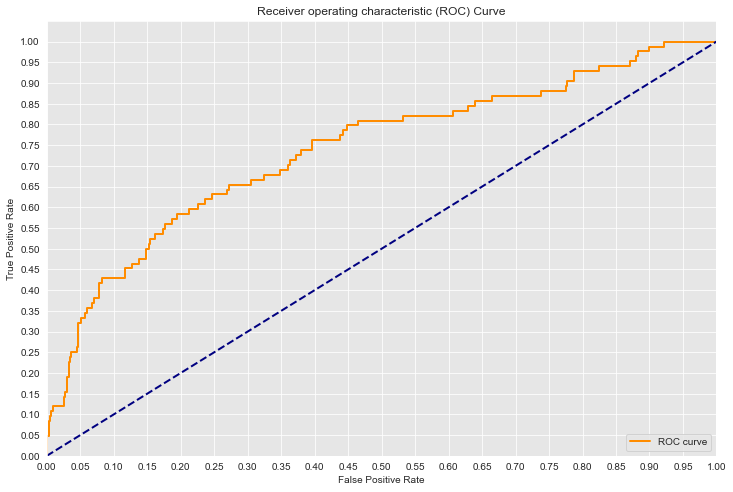

In [23]:
# visualization of the ROC curve

sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(12, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Decision Tree



In [24]:
#creating the classifier and fitting it on the training data
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train_whole, y_train)


DecisionTreeClassifier(criterion='entropy')

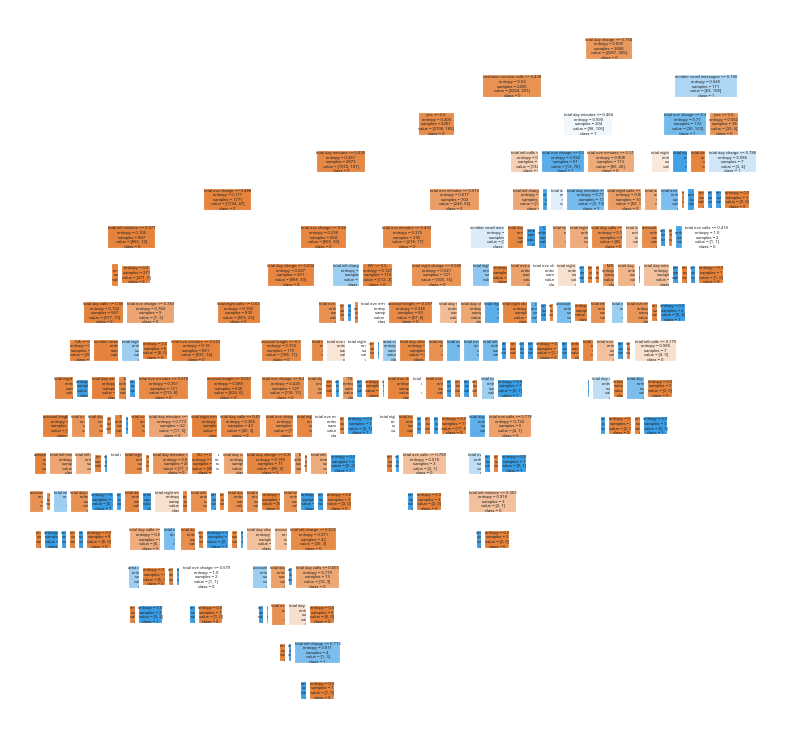

In [25]:
# plotting the decision tree
fig,axes = plt.subplots(nrows = 1,ncols = 1 , figsize = (3,3), dpi=300)
tree.plot_tree(clf, 
               feature_names = X_train_whole.columns,
               class_names=np.unique(y).astype('str'),
               filled = True)
plt.show()

In [26]:

y_preds = clf.predict(X_test_whole)
print("Accuracy:", accuracy_score(y_test, y_preds))

Accuracy: 0.8755622188905547


## confusion matrix


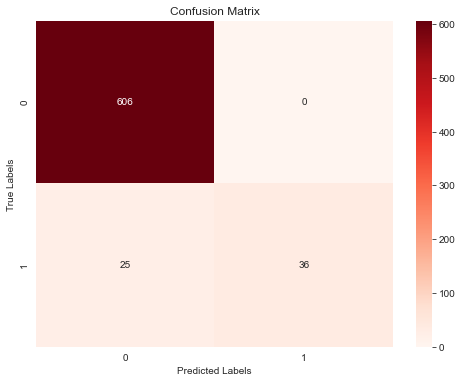

In [27]:
# Make predictions on the test set
model = LogisticRegression()
model.fit(X_train_whole, y_hat_train)


y_pred = model.predict(X_test_whole)

# Generate the confusion matrix
cm = confusion_matrix(y_hat_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [28]:
# Calculating and displaying the accuracy,precision, recall, and F1-score
accuracy = accuracy_score(y_hat_test, y_pred)
precision = precision_score(y_hat_test, y_pred)
recall = recall_score(y_hat_test, y_pred)
f1 = f1_score(y_hat_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


Accuracy: 0.9625187406296851
Precision: 1.0
Recall: 0.5901639344262295
F1-Score: 0.7422680412371134



Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       606
           1       1.00      0.59      0.74        61

    accuracy                           0.96       667
   macro avg       0.98      0.80      0.86       667
weighted avg       0.96      0.96      0.96       667



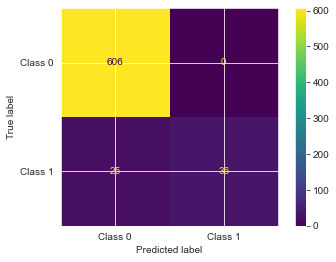

In [29]:
# Generating classification report (Precision, Recall, F1-score for each class)
print("\nClassification Report:")
print(classification_report(y_hat_test, y_pred))

# Displaying the confusion matrix visually
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"]).plot()

## Evaluation

The goal of this project was to provide valuable insights on ways of reducing the loss of money because of customers who do not stick around very long (churn).
I used the logistic Regression and Decision Tree Classifier for modeling. I split the data into a training set which was 80% and testing set which was 20%.
The performance Metrics that I calculated to assess the model’s effectiveness include AUC ROC- Curve, confusion matrix, Accuracy, precision, recall and F1-score. For the decision Tree Classifier, the accuracy was 87%. For the AUC ROC- Curve the AUC was 0.738, which is good for our model.From the confusion matrix, i generated an accuracy = 96% ,precision = 1, recall = 0.5902 and F1-score = 0.7422. 

Perfect classifiers have an AUC score of 1.0 while a score of 0.5 is deemed trivial or worthless.
The model performed well and it can be improved by including more data for example what are the charges rate of other telecommunication companies in the market, how is the network coverage in every state or area etc.



## Conclusion

I identified the key factors influencing churn, to be total day charge, total evening charge and total night charge customer service calls. The predictive model had an accuracy of 87%.
The model was evaluated using a confusion matrix. It performed well on both the training and validation datasets, showing a recall of 59%, meaning it successfully identified more than half of the churn.


## Reccomendation
Based on the evaluation, the company can reduce churn by having personalized offers to the high risk customers for examplehaving a discount on the charges on the day calls or the night calls.
improve on customer service calls so as to get feedback from the high risk customers on what challenges they are facing and on the areas to improve on.